# Tail inequality for $\chi^2$

In [1]:
import jax
import seaborn as sns
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
key = jax.random.PRNGKey(314)
key_subg, key_norm = jax.random.split(key)

In [88]:
lmbda = 1/4

In [89]:
n_trials = 1000
n_samples = 500
samples_subg = jax.random.beta(key_subg, a=3, b=3, shape=(n_trials, n_samples))
samples_norm = jax.random.normal(key_norm, shape=(n_trials, n_samples,))

In [90]:
@jax.vmap
def log_mgf_subg(samples):
    n_samples = len(samples)
    return jax.nn.logsumexp(lmbda * samples ** 2, b=1/n_samples)

@jax.vmap
def log_mgf_subg_gauss(samples_sg, samples_g):
    """
    samples_sg: samples from sub-gaussian random variable
    samples_g: samples from a N(0,1)
    """
    n_samples = len(samples_g)
    return jax.nn.logsumexp(jnp.sqrt(2 * lmbda) * samples_sg[:, None] * samples_g[None, :], b=1 / n_samples ** 2)

In [91]:
I1 = log_mgf_subg(samples_subg)
I2 = log_mgf_subg_gauss(samples_subg, samples_norm)

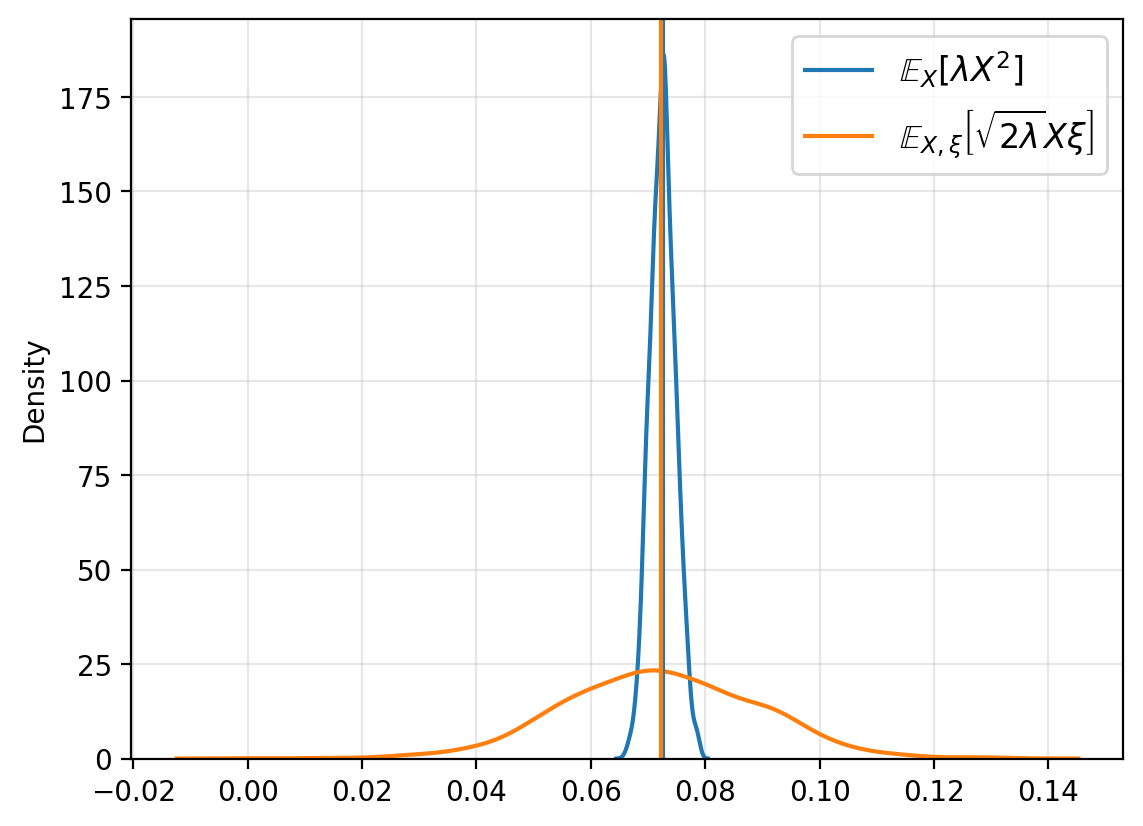

In [92]:
sns.kdeplot(I1, label=r"$\mathbb{E}_X\left[\lambda X^2\right]$")
sns.kdeplot(I2, label=r"$\mathbb{E}_{X,\xi}\left[\sqrt{2\lambda}X\xi\right]$")
plt.axvline(x=jnp.mean(I1), c="tab:blue")
plt.axvline(x=jnp.mean(I2), c="tab:orange")
plt.legend(fontsize=12)
plt.grid(alpha=0.3)